In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [207]:
df = pd.read_csv("Arrests.csv",index_col=0)
df.head()

,released,colour,year,age,sex,employed,citizen,checks
1,Yes,White,2002,21,Male,Yes,Yes,3
2,No,Black,1999,17,Male,Yes,Yes,3
3,Yes,White,2000,24,Male,Yes,Yes,3
4,No,Black,2000,46,Male,Yes,Yes,1
5,Yes,Black,1999,27,Female,Yes,Yes,1


In [208]:
df.isnull().sum()

released    0
colour      0
year        0
age         0
sex         0
employed    0
citizen     0
checks      0
dtype: int64

In [209]:
df.columns

Index(['released', 'colour', 'year', 'age', 'sex', 'employed', 'citizen',
       'checks'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5226 entries, 1 to 5226
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   released  5226 non-null   object
 1   colour    5226 non-null   object
 2   year      5226 non-null   int64 
 3   age       5226 non-null   int64 
 4   sex       5226 non-null   object
 5   employed  5226 non-null   object
 6   citizen   5226 non-null   object
 7   checks    5226 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 367.5+ KB


In [211]:
df['checks'] = df['checks'].astype("category")
df['colour'] = df['colour'].astype('category')
df['sex'] = df['sex'].astype("category")
df['employed'] = df['employed'].astype("category")
df['citizen'] = df['citizen'].astype("category")

In [212]:
df['year'] = pd.to_datetime(df['year'],format='%Y')
df['year'].value_counts()

2000-01-01    1270
2001-01-01    1211
1999-01-01    1099
1998-01-01     877
1997-01-01     492
2002-01-01     277
Name: year, dtype: int64

In [213]:
df['year'] = df['year'].dt.year

In [214]:
df.describe()

,year,age
count,5226.000000,5226.000000
mean,1999.509376,23.846537
std,1.390056,8.316133
min,1997.000000,12.000000
25%,1998.000000,18.000000
50%,2000.000000,21.000000
75%,2001.000000,27.000000
max,2002.000000,66.000000


In [215]:
df.shape

(5226, 8)

## Exploratory data analysis

In [216]:
sns.set_style("whitegrid")

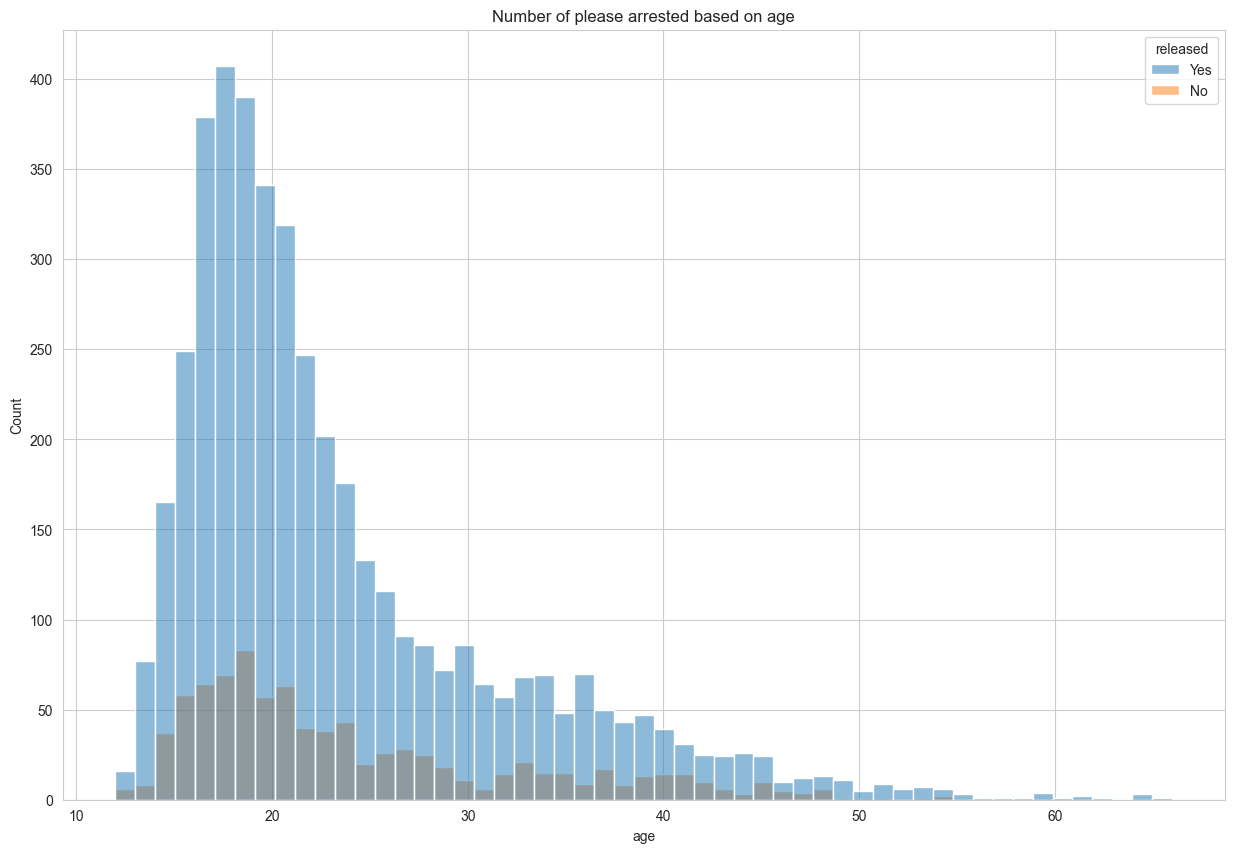

In [217]:
fig = plt.figure(figsize=(15,10))
sns.histplot(data=df,x="age",hue="released")
plt.title("Number of please arrested based on age")
plt.show()

Number of arrests are more among the age group 18 to 25

In [218]:
#define the age category

label = ["kids","youth","middle age","Old adult"]
bin= [0,13,39,59,99]

df['age_cat'] = pd.cut(df['age'],labels=label,bins=bin)

df.head()

,released,colour,year,age,sex,employed,citizen,checks,age_cat
1,Yes,White,2002,21,Male,Yes,Yes,3,youth
2,No,Black,1999,17,Male,Yes,Yes,3,youth
3,Yes,White,2000,24,Male,Yes,Yes,3,youth
4,No,Black,2000,46,Male,Yes,Yes,1,middle age
5,Yes,Black,1999,27,Female,Yes,Yes,1,youth


EDA

In [219]:
year_data = df.groupby(["year","sex",'age_cat'])['released'].value_counts().reset_index(name="counts")
year_data.head()

,year,sex,age_cat,released,counts
0,1997,Female,youth,Yes,30
1,1997,Female,youth,No,2
2,1997,Male,kids,Yes,2
3,1997,Male,kids,No,1
4,1997,Male,youth,Yes,317


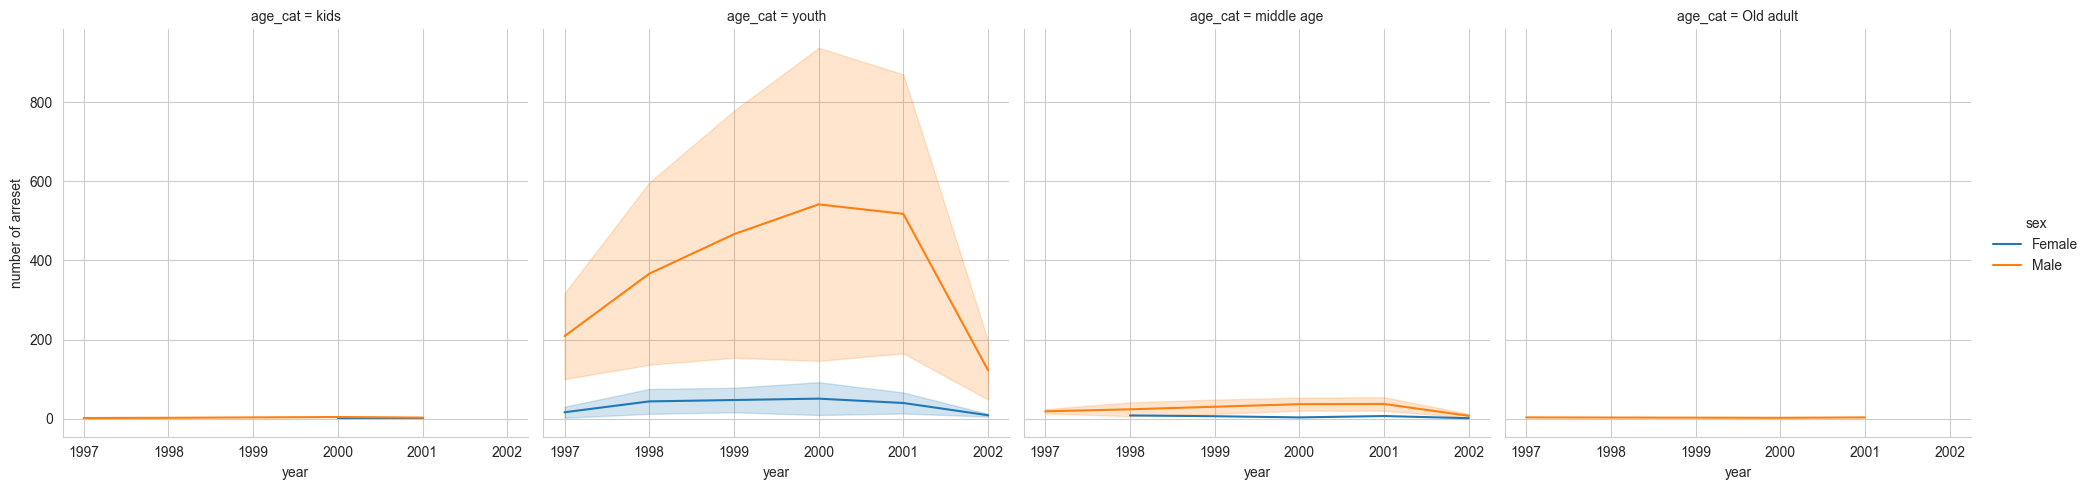

In [220]:
g = sns.relplot(data=year_data,x="year",y="counts",hue="sex",kind='line',col='age_cat')
g.set_ylabels("number of arreset")
sns.despine()
plt.show()

Number of Arrest due to marijuana is high during 1999 to 2001 among the youth males and it is started declining after 2001

Text(0, 0.5, 'Number of consumers')

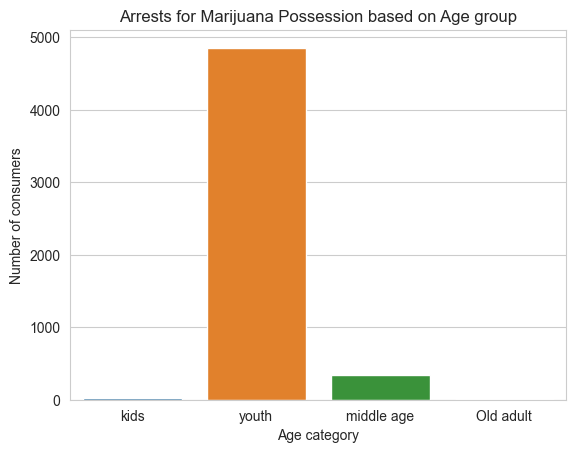

In [221]:
age_group=df['age_cat'].value_counts().reset_index(name="values")

sns.barplot(data=age_group,x="index",y="values")
plt.title("Arrests for Marijuana Possession based on Age group")
plt.xlabel("Age category")
plt.ylabel("Number of consumers")

In [227]:
new_data = df.groupby(["age_cat"])['released','sex','colour','citizen','checks'].value_counts().reset_index(name="counts")
new_data.head()

,age_cat,released,sex,colour,citizen,checks,counts
0,kids,Yes,Male,White,Yes,0,7
1,kids,Yes,Male,Black,Yes,0,3
2,kids,Yes,Male,White,Yes,1,2
3,kids,No,Male,White,Yes,3,1
4,kids,Yes,Male,Black,No,2,1


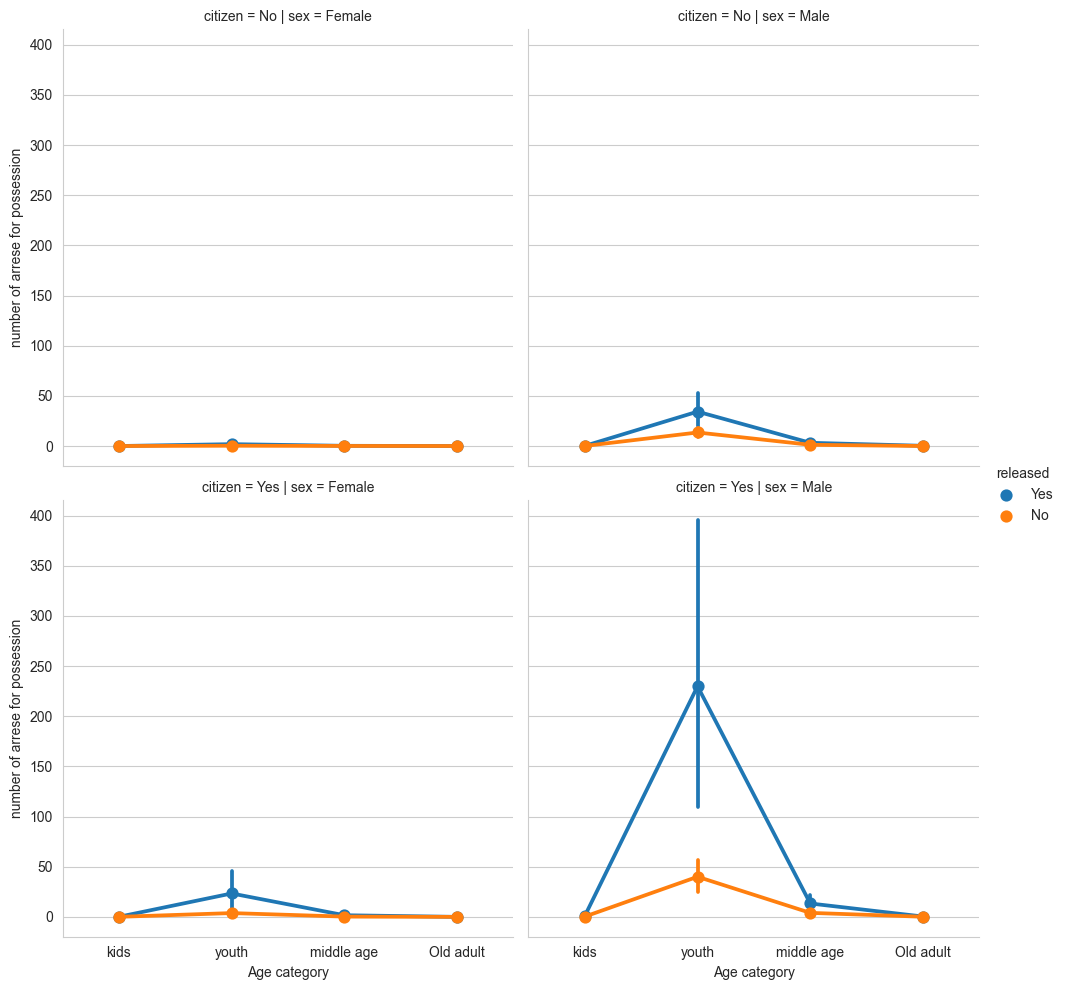

In [228]:
g= sns.catplot(data=new_data,x="age_cat",y="counts",kind="point",hue="released",col="sex",row='citizen')
g.set_ylabels("number of arrese for possession")
g.set_xlabels("Age category")
plt.show()

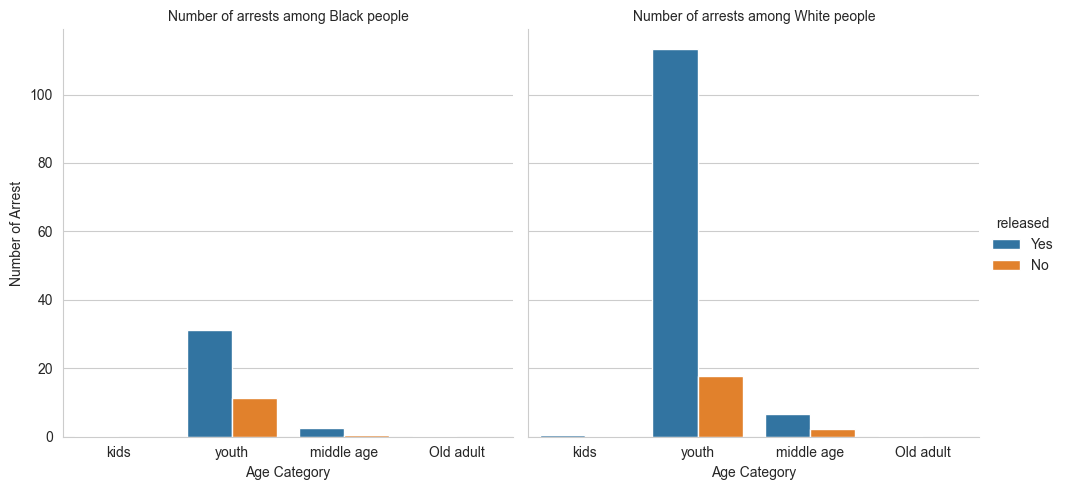

In [229]:
g = sns.catplot(data=new_data,x="age_cat",y="counts",kind="bar",hue="released",col="colour",ci=None,)
g.set_xlabels("Age Category")
g.set_ylabels("Number of Arrest")
g.set_titles("Number of arrests among {col_name} people")

In [225]:
checks_data =  df.groupby("checks")['released'].value_counts().reset_index(name="arreset")


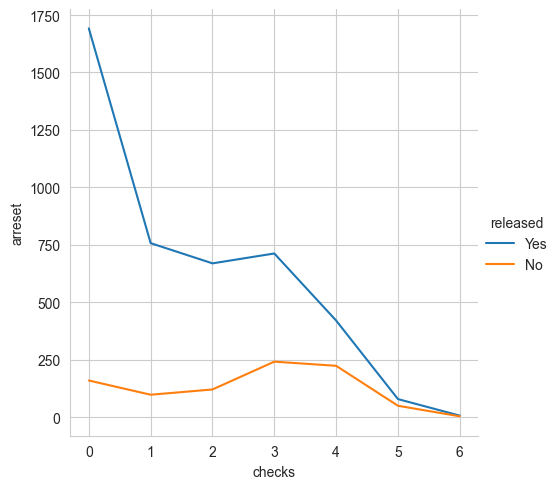

In [226]:
sns.relplot(data=checks_data,x="checks",y="arreset",kind='line',hue="released")
plt.show()

most number of checks does not always end up in arrests 